In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1523]:
pd.set_option('display.max_rows', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df_trimmed_outliers.csv')

In [4]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,TX,75240,2.0,3.0,1494.0,1969.0,1995
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,TX,75229,2.0,3.0,1710.0,1958.0,2100
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095
4,Dallas,TX,75229,2.0,3.0,2556.0,1958.0,3450
...,...,...,...,...,...,...,...,...
1902,Los Angeles,CA,91411,2.0,3.0,1502.0,1949.0,4700
1903,Los Angeles,CA,90011,1.0,2.0,700.0,1935.0,2150
1904,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150
1905,Los Angeles,CA,91316,3.0,2.0,1564.0,1989.0,4200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1907 non-null   object 
 1   state      1907 non-null   object 
 2   zipcode    1907 non-null   int64  
 3   bathrooms  1905 non-null   float64
 4   bedrooms   1791 non-null   float64
 5   area       1686 non-null   float64
 6   year       1145 non-null   float64
 7   price      1907 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 119.3+ KB


In [6]:
df['zipcode'] = df['zipcode'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1907 non-null   object 
 1   state      1907 non-null   object 
 2   zipcode    1907 non-null   object 
 3   bathrooms  1905 non-null   float64
 4   bedrooms   1791 non-null   float64
 5   area       1686 non-null   float64
 6   year       1145 non-null   float64
 7   price      1907 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 119.3+ KB


In [8]:
# tranform "year" to "how long till now"
df['year'] = df['year'].apply(lambda x: 2021-x)

In [9]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,TX,75240,2.0,3.0,1494.0,52.0,1995
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,TX,75229,2.0,3.0,1710.0,63.0,2100
3,Dallas,TX,75219,1.0,1.0,655.0,40.0,1095
4,Dallas,TX,75229,2.0,3.0,2556.0,63.0,3450
...,...,...,...,...,...,...,...,...
1902,Los Angeles,CA,91411,2.0,3.0,1502.0,72.0,4700
1903,Los Angeles,CA,90011,1.0,2.0,700.0,86.0,2150
1904,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150
1905,Los Angeles,CA,91316,3.0,2.0,1564.0,32.0,4200


In [10]:
# drop "state"
df.drop(columns=['state'], inplace=True)

In [11]:
df

,city,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,75240,2.0,3.0,1494.0,52.0,1995
1,Dallas,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,75229,2.0,3.0,1710.0,63.0,2100
3,Dallas,75219,1.0,1.0,655.0,40.0,1095
4,Dallas,75229,2.0,3.0,2556.0,63.0,3450
...,...,...,...,...,...,...,...
1902,Los Angeles,91411,2.0,3.0,1502.0,72.0,4700
1903,Los Angeles,90011,1.0,2.0,700.0,86.0,2150
1904,Los Angeles,90731,1.0,2.0,850.0,NaN,2150
1905,Los Angeles,91316,3.0,2.0,1564.0,32.0,4200


### grouping rare zipcodes

In [12]:
# check the number of labels in "zipcode"
for col in ['zipcode']:
    print('variable: ', col, ' number of labels: ', df[col].nunique())

variable:  zipcode  number of labels:  132


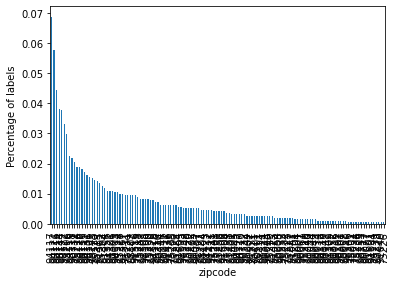

<Figure size 1440x720 with 0 Axes>

In [13]:
# plot how frequentfly each label appears in the dataset
# (the percentage of each label in the data)

total_number = len(df)

for col in ['zipcode']:
    
    temp_df = pd.Series(df[col].value_counts()/total_number)
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.set_ylabel('Percentage of labels')
    plt.figure(figsize=[20, 10])
    plt.show()

In [14]:
# how is the target, "price" related to these categories?

def calculate_mean_target_per_category(df, var):
    
    # total number of labels
    total_number = len(df)
    
    # percentage of labels
    temp_df = pd.Series(df[var].value_counts()/total_number).reset_index()
    temp_df.columns = [var, 'perc']
    
    # add the mean price
    temp_df = temp_df.merge(df.groupby([var])['price'].mean().reset_index(), on=var, how='left')
    
    return temp_df

In [15]:
temp_df = calculate_mean_target_per_category(df, 'zipcode')
temp_df

,zipcode,perc,price
0,94117,0.068694,3602.229008
1,94122,0.057682,3237.900000
2,98116,0.044573,2369.294118
3,94114,0.038280,3475.547945
4,98144,0.037756,2184.902778
...,...,...,...
127,75234,0.000524,850.000000
128,75051,0.000524,1800.000000
129,75202,0.000524,4987.000000
130,90077,0.000524,6700.000000


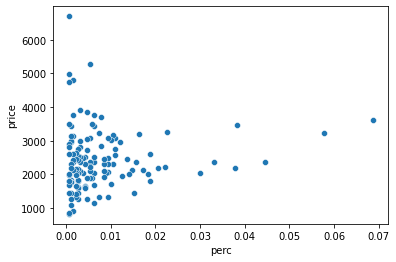

In [16]:
sns.scatterplot(x='perc', y='price', data=temp_df)

In [17]:
# rare labels: grouping under a new label

def group_rare_labels(df, var):
    
    total_number = len(df)
    
    # first calcualte the % of each label
    temp_df = pd.Series(df[var].value_counts()/total_number)
    
    # create a dictionary to replace the rare labels with the string
    # "others" if they are present in less than 2%
    
    grouping_dict = {
        k: ('others' if k not in temp_df[temp_df >= 0.02].index else k)
        for k in temp_df.index
    }
    
    # now replace the rare categories
    tmp = df[var].map(grouping_dict)
    
    return tmp

In [18]:
# group rare labels in "zipcode"

df['zipcode'] = group_rare_labels(df, 'zipcode')

df['zipcode'].head(10)

0    others
1    others
2    others
3    others
4    others
5     75206
6    others
7    others
8     75206
9    others
Name: zipcode, dtype: object

In [19]:
temp_df = calculate_mean_target_per_category(df, 'zipcode')
temp_df

,zipcode,perc,price
0,others,0.625066,2378.831376
1,94117,0.068694,3602.229008
2,94122,0.057682,3237.900000
3,98116,0.044573,2369.294118
4,94114,0.038280,3475.547945
5,98144,0.037756,2184.902778
6,98122,0.033036,2378.412698
7,75206,0.029890,2051.210526
8,94116,0.022549,3271.674419
9,98118,0.022024,2225.952381


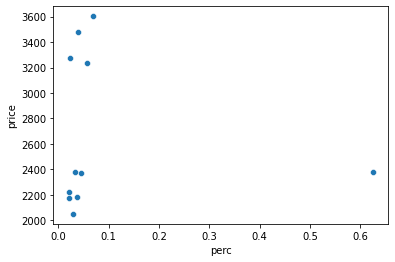

In [20]:
# plot again
sns.scatterplot(x='perc', y='price', data=temp_df)
# great results: high freq labels show linear relationship while the rest appraoches median

(0.0, 0.1)

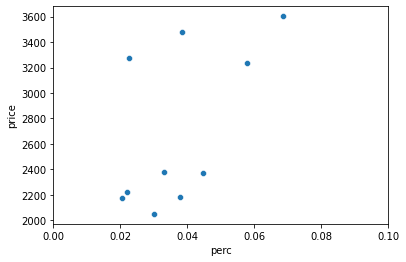

In [21]:
# zoom in only high freq labels
ax = sns.scatterplot(x='perc', y='price', data=temp_df)
ax.set_xlim(0, 0.1)

### Select predictors and target

In [22]:
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

In [23]:
# print(X)

In [24]:
# print(y)

### Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :], df.iloc[:, -1], test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1525, 7), (382, 7), (1525,), (382,))

In [26]:
# so far, the outliers have already been engineered

# Feature Engineering Attack Plan

In [27]:
# attack plan:
# missing values


# variable by variable:
# city: target_guided encoding by median price
# zipcode: target_guided encoding by median price


# feature scaling

### Missing values

In [28]:
df.isnull().sum()

city           0
zipcode        0
bathrooms      2
bedrooms     116
area         221
year         762
price          0
dtype: int64

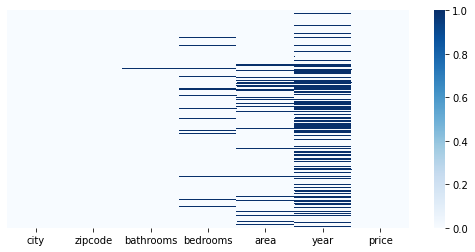

In [29]:
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Blues")

##### (figure out the imputation plan)

In [30]:
# select the variables with mssing observations

vars_with_na = [var for var in df.columns if df[var].isnull().mean()>0]
vars_with_na

['bathrooms', 'bedrooms', 'area', 'year']

In [31]:
# find out the percentage of observations missing per variable
data_na = df[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
3,year,0.399580
2,area,0.115889
1,bedrooms,0.060829
0,bathrooms,0.001049


In [32]:
# due to relative small amount, "bedrooms" and "bathrooms" will be mode imputed

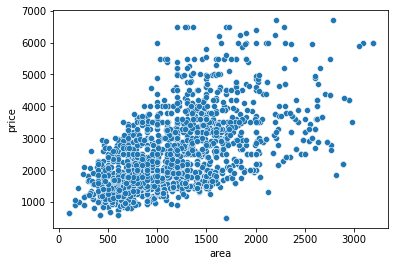

In [33]:
# check the correlation between "area" and our predictor
sns.scatterplot(data=df, x='area', y='price')
# seems like a strong postive correlation

In [34]:
# median value of "price" and "area"
print('median price value: ', '$',df['price'].median())
print('median area value: ', df['area'].median(), 'square ft')

median price value:  $ 2350.0
median area value:  1138.0 square ft


In [35]:
# check if there is anything interesting about the records whose "area" variable is missing
area_is_missing = df[df['area'].isnull()==1]

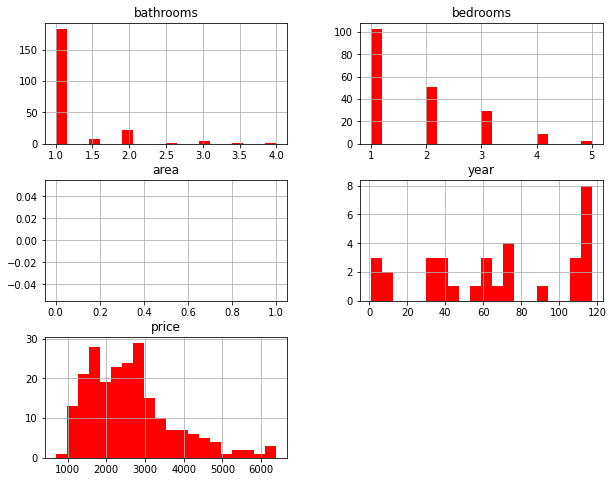

In [36]:
area_is_missing.hist(bins=20, figsize=(10, 8), color='r')
plt.show()
# looks similar to the population

In [37]:
# because it seems that "area" data is missing at random, we'll use mean/median imputation

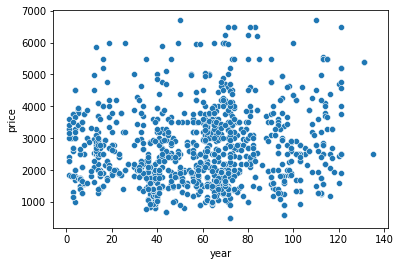

In [38]:
# Check variable "year"
sns.scatterplot(data=df, x='year', y='price')
# no clear relationships

In [39]:
# we'll use random sample imputation for variable "year"

### Missing value imputation

##### ("bedrooms" & "bathrooms")

In [40]:
# "bedrooms" & "bathrooms" - mean imputing

In [41]:
# define a function that works the work

def impute_na(df, variable, strategy):
    return df[variable].fillna(strategy)

In [42]:
# calculate the mean bedrooms
mean_bedrooms = X_train['bedrooms'].mean()
mean_bedrooms

2.2314165497896212

In [43]:
# calculate the mean bathrooms
mean_bathrooms = X_train['bathrooms'].mean()
mean_bathrooms

1.5784635587655942

In [44]:
# impute "bedrooms"
X_train['bedrooms'] = impute_na(X_train, 'bedrooms', mean_bedrooms)
X_test['bedrooms'] = impute_na(X_test, 'bedrooms', mean_bedrooms)

In [45]:
# impute "bathrooms"
X_train['bathrooms'] = impute_na(X_train, 'bathrooms', mean_bathrooms)
X_test['bathrooms'] = impute_na(X_test, 'bathrooms', mean_bathrooms)

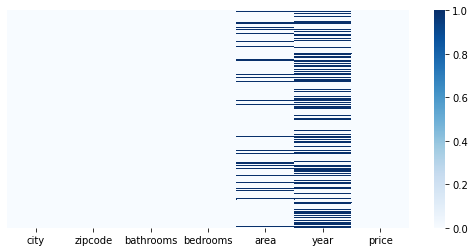

In [46]:
# check X_train
plt.figure(figsize=(9,4))
sns.heatmap(X_train.isnull(), yticklabels=False, cmap="Blues")

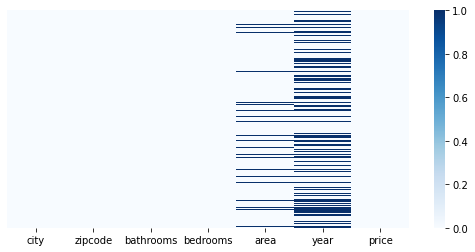

In [47]:
# check X_test
plt.figure(figsize=(9,4))
sns.heatmap(X_test.isnull(), yticklabels=False, cmap="Blues")

##### ("area")

In [48]:
median_area = X_train['area'].median()
median_area

1133.5

In [49]:
# impute
X_train['area'] = impute_na(X_train, 'area', median_area)
X_test['area'] = impute_na(X_test, 'area', median_area)

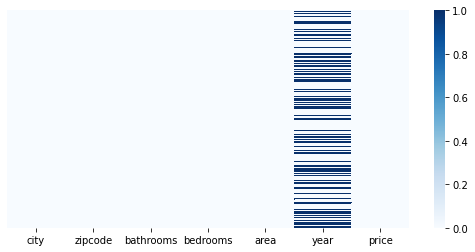

In [50]:
# check X_train
plt.figure(figsize=(9,4))
sns.heatmap(X_train.isnull(), yticklabels=False, cmap="Blues")

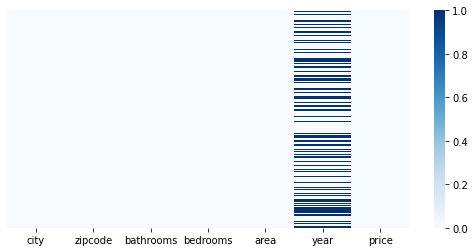

In [51]:
# check X_test
plt.figure(figsize=(9,4))
sns.heatmap(X_test.isnull(), yticklabels=False, cmap="Blues")

##### ("year")

In [52]:
mode_year = X_train['year'].mode()[0]
mode_year

72.0

In [53]:
# impute
X_train['year'] = impute_na(X_train, 'year', mode_year)
X_test['year'] = impute_na(X_test, 'year', mode_year)

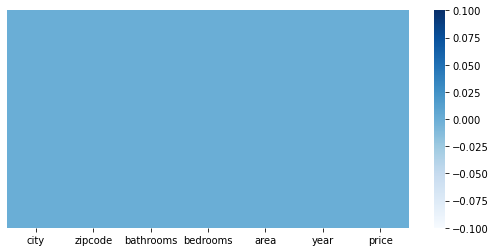

In [54]:
# check X_train
plt.figure(figsize=(9,4))
sns.heatmap(X_train.isnull(), yticklabels=False, cmap="Blues")

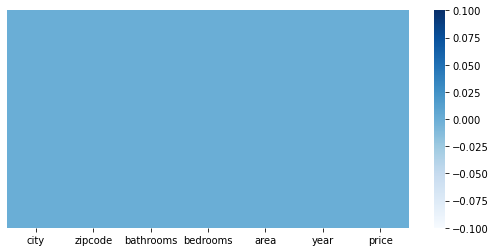

In [55]:
# check X_test
plt.figure(figsize=(9,4))
sns.heatmap(X_test.isnull(), yticklabels=False, cmap="Blues")

In [56]:
X_train.isnull().sum()

city         0
zipcode      0
bathrooms    0
bedrooms     0
area         0
year         0
price        0
dtype: int64

In [57]:
X_test.isnull().sum()

city         0
zipcode      0
bathrooms    0
bedrooms     0
area         0
year         0
price        0
dtype: int64

### Categorical variable encoding

##### ("city")

In [58]:
# "city" - target-guided encoding
# encoded by the ranking of the median price per city (lowest to highest):
# Dallas - Seattle - Los Angeles - San Francisco

In [59]:
# median price per city
dal = df[df['city'] == 'Dallas']
sf = df[df['city'] == 'San Francisco']
la = df[df['city'] == 'Los Angeles']
sea = df[df['city'] == 'Seattle']

print('Dallas: ', '$', dal['price'].median())
print('San Francisco: ', '$', sf['price'].median())
print('Los Angeles: ', '$', la['price'].median())
print('Seattle: ', '$', sea['price'].median())

Dallas:  $ 1775.0
San Francisco:  $ 3195.0
Los Angeles:  $ 2500.0
Seattle:  $ 2075.0


In [60]:
# order the labels according to the median target value

X_train.groupby(['city'])['price'].median().sort_values()

city
Dallas           1795
Seattle          2000
Los Angeles      2500
San Francisco    3100
Name: price, dtype: int64

In [61]:
# generate an ordered list with the labels

city_ordered_labels = X_train.groupby(['city'])['price'].median().sort_values().index

city_ordered_labels

Index(['Dallas', 'Seattle', 'Los Angeles', 'San Francisco'], dtype='object', name='city')

In [62]:
# create a dictionary with the mappings of categories to numbers

city_ordinal_mapping = {k: i for i, k in enumerate(city_ordered_labels, 0)}

city_ordinal_mapping

{'Dallas': 0, 'Seattle': 1, 'Los Angeles': 2, 'San Francisco': 3}

In [63]:
# replace the labels with the integers

X_train['city'] = X_train['city'].map(city_ordinal_mapping)
X_test['city'] = X_test['city'].map(city_ordinal_mapping)

##### ("zipcode")

In [64]:
# figure out how to deal with "zipcode"
df['zipcode'].value_counts()

others    1192
94117      131
94122      110
98116       85
94114       73
98144       72
98122       63
75206       57
94116       43
98118       42
90731       39
Name: zipcode, dtype: int64

In [65]:
top_zipcodes = df[(df['zipcode']== '94117') | (df['zipcode']== '94122') | (df['zipcode']== '98116') | (df['zipcode']== '98114') | (df['zipcode']== '98144') | (df['zipcode']== '98122') | (df['zipcode']== '75206')]

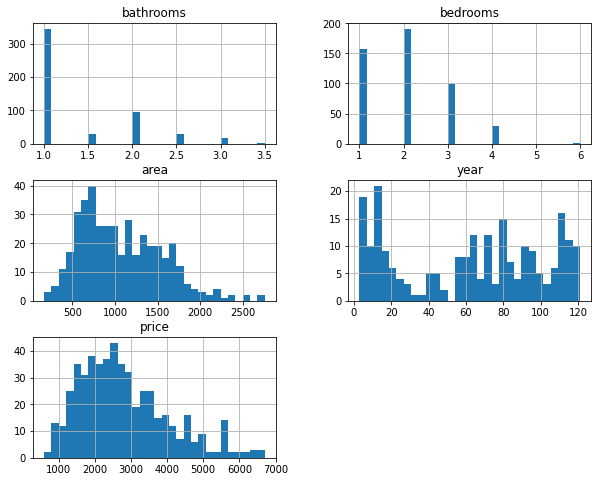

In [66]:
top_zipcodes.hist(bins=30, figsize=(10, 8))
plt.show()

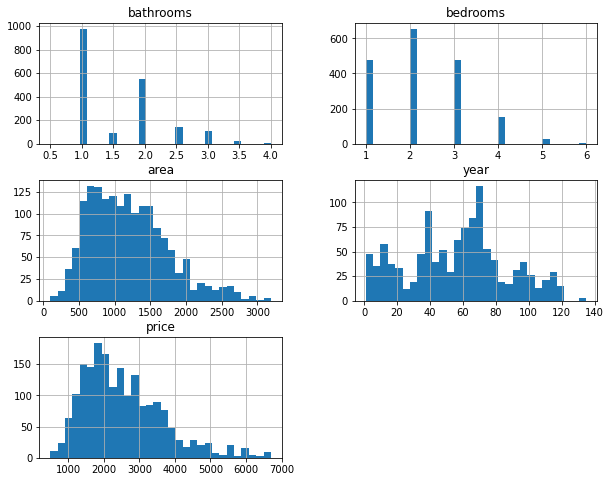

In [67]:
df.hist(bins=30, figsize=(10, 8))
plt.show()

In [68]:
# strategy:
# first, select out "big" zipcodes (freq higher than 2%) (done)
# group all the other labels like in "rare labels grouping" (done)
# last, target-guided encoding

In [69]:
# target-guided encoding
X_train.groupby(['zipcode'])['price'].mean().sort_values()

zipcode
75206     2007.477273
98144     2132.730769
98118     2203.620690
90731     2204.000000
98122     2349.326923
others    2353.600209
98116     2367.794118
94122     3142.147727
94116     3253.605263
94114     3395.446429
94117     3636.083333
Name: price, dtype: float64

In [70]:
# generate an ordered list with the labels

ordered_labels = X_train.groupby(['zipcode'])['price'].mean().sort_values().index

ordered_labels

Index(['75206', '98144', '98118', '90731', '98122', 'others', '98116', '94122',
       '94116', '94114', '94117'],
      dtype='object', name='zipcode')

In [71]:
ordinal_mapping2 = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping2

{'75206': 0,
 '98144': 1,
 '98118': 2,
 '90731': 3,
 '98122': 4,
 'others': 5,
 '98116': 6,
 '94122': 7,
 '94116': 8,
 '94114': 9,
 '94117': 10}

In [72]:
# replace the labels with the integers

X_train['zipcode'] = X_train['zipcode'].map(ordinal_mapping2)
X_test['zipcode'] = X_test['zipcode'].map(ordinal_mapping2)

In [73]:
# check the results
X_train['zipcode'].head(10)

1725     5
1353     2
558      9
1430     5
1379     1
268      5
393      5
31       5
801     10
465      5
Name: zipcode, dtype: int64

In [74]:
X_train

,city,zipcode,bathrooms,bedrooms,area,year,price
1725,2,5,2.5,2.000000,1233.0,42.0,2450
1353,1,2,2.0,3.000000,900.0,62.0,2200
558,3,9,2.0,3.000000,1700.0,72.0,5595
1430,1,5,2.5,4.000000,1770.0,72.0,2850
1379,1,1,1.0,2.000000,1200.0,101.0,2500
...,...,...,...,...,...,...,...
835,3,9,1.0,2.000000,1200.0,72.0,4100
1216,1,5,1.5,2.000000,1000.0,38.0,1400
1653,2,5,1.0,1.000000,624.0,64.0,1500
559,3,10,1.0,2.231417,1133.5,72.0,2350


In [75]:
X_test

,city,zipcode,bathrooms,bedrooms,area,year,price
1081,1,5,2.0,2.0,1050.0,14.0,2000
1861,2,5,2.0,2.0,1170.0,14.0,2800
1260,1,5,1.5,1.0,865.0,72.0,2400
1182,1,4,1.0,1.0,735.0,72.0,1595
135,0,5,1.0,1.0,448.0,37.0,850
...,...,...,...,...,...,...,...
1647,2,5,2.0,4.0,2000.0,74.0,3200
1340,1,6,2.0,2.0,1312.0,43.0,3150
536,3,7,1.0,3.0,1360.0,81.0,3850
884,3,9,1.0,1.0,1133.5,72.0,3500


### Numerical variable transformation

In [76]:
# for future comparison use
X_train_before_log = X_train.copy()
X_test_before_log = X_train.copy()

In [77]:
for var in ['bathrooms', 'bedrooms', 'area', 'year', 'price']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [78]:
# check taht training set does not contain null values in the engineered variables
[var for var in ['bathrooms', 'bedrooms', 'area', 'year', 'price'] if X_train[var].isnull().sum()>0]

[]

In [79]:
# same for test set
[var for var in ['bathrooms', 'bedrooms', 'area', 'year', 'price'] if X_test[var].isnull().sum()>0]

[]

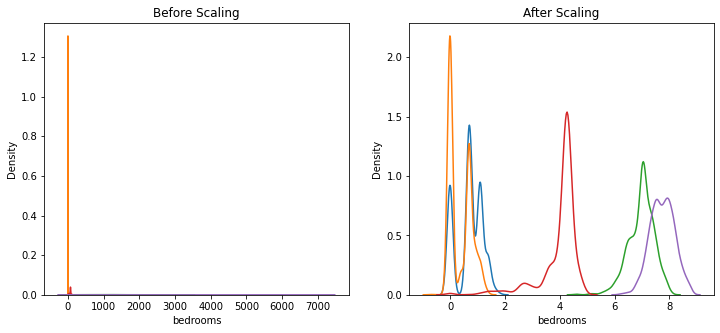

In [80]:
# compare the variable distributions before and after log transformation

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_before_log['bedrooms'], ax=ax1)
sns.kdeplot(X_train_before_log['bathrooms'], ax=ax1)
sns.kdeplot(X_train_before_log['area'], ax=ax1)
sns.kdeplot(X_train_before_log['year'], ax=ax1)
sns.kdeplot(X_train_before_log['price'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train['bedrooms'], ax=ax2)
sns.kdeplot(X_train['bathrooms'], ax=ax2)
sns.kdeplot(X_train['area'], ax=ax2, )
sns.kdeplot(X_train['year'], ax=ax2)
sns.kdeplot(X_train['price'], ax=ax2)
plt.show()

### Feature scaling

In [81]:
# In future model building, we will use linear regression and svr
# because they are sensitive to feature magnitutde, we need to do feature scaling
# we decide to use standardization

In [82]:
# before feature situation:
# categorical variables: (encoded) "city", "zipcode" 
# numerical variables (including target): (log transformed)
X_train

,city,zipcode,bathrooms,bedrooms,area,year,price
1725,2,5,0.916291,0.693147,7.117206,3.737670,7.803843
1353,1,2,0.693147,1.098612,6.802395,4.127134,7.696213
558,3,9,0.693147,1.098612,7.438384,4.276666,8.629629
1430,1,5,0.916291,1.386294,7.478735,4.276666,7.955074
1379,1,1,0.000000,0.693147,7.090077,4.615121,7.824046
...,...,...,...,...,...,...,...
835,3,9,0.000000,0.693147,7.090077,4.276666,8.318742
1216,1,5,0.405465,0.693147,6.907755,3.637586,7.244228
1653,2,5,0.000000,0.000000,6.436150,4.158883,7.313220
559,3,10,0.000000,0.802637,7.033065,4.276666,7.762171


In [83]:
# what's to be done:
# standard scale numeric variables except the target

In [84]:
# for future comparison use
X_train_before_scaled = X_train.copy()
X_test_before_scaled = X_test.copy()

In [85]:
# capture all variables in a list, except the target

train_vars = [var for var in X_train.columns if var not in ['price']]
train_vars

['city', 'zipcode', 'bathrooms', 'bedrooms', 'area', 'year']

In [86]:
# scaler, for standardization
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the training set
scaler.fit(X_train[train_vars])

# transform training and test sets
X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

In [87]:
# the scaler stores the mean and sd of the features
scaler.mean_, scaler.scale_

(array([1.49180328, 5.32196721, 0.37049545, 0.70222183, 6.98225032,
        3.99793634]),
 array([1.10887553, 2.07607986, 0.40749742, 0.46211613, 0.46481783,
        0.69128978]))

In [88]:
# transform the NumPy arrays to dataframes
X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_test = pd.DataFrame(X_test, columns = X_test.columns)

In [89]:
X_train_before_scaled

,city,zipcode,bathrooms,bedrooms,area,year,price
1725,2,5,0.916291,0.693147,7.117206,3.737670,7.803843
1353,1,2,0.693147,1.098612,6.802395,4.127134,7.696213
558,3,9,0.693147,1.098612,7.438384,4.276666,8.629629
1430,1,5,0.916291,1.386294,7.478735,4.276666,7.955074
1379,1,1,0.000000,0.693147,7.090077,4.615121,7.824046
...,...,...,...,...,...,...,...
835,3,9,0.000000,0.693147,7.090077,4.276666,8.318742
1216,1,5,0.405465,0.693147,6.907755,3.637586,7.244228
1653,2,5,0.000000,0.000000,6.436150,4.158883,7.313220
559,3,10,0.000000,0.802637,7.033065,4.276666,7.762171


In [90]:
X_train

,city,zipcode,bathrooms,bedrooms,area,year,price
1725,0.458299,-0.155084,1.339383,-0.019637,0.290340,-0.376494,7.803843
1353,-0.443515,-1.600115,0.791788,0.857772,-0.386938,0.186894,7.696213
558,1.360114,1.771624,0.791788,0.857772,0.981316,0.403203,8.629629
1430,-0.443515,-0.155084,1.339383,1.480304,1.068127,0.403203,7.955074
1379,-0.443515,-2.081792,-0.909197,-0.019637,0.231976,0.892801,7.824046
...,...,...,...,...,...,...,...
835,1.360114,1.771624,-0.909197,-0.019637,0.231976,0.403203,8.318742
1216,-0.443515,-0.155084,0.085816,-0.019637,-0.160267,-0.521272,7.244228
1653,0.458299,-0.155084,-0.909197,-1.519579,-1.174869,0.232821,7.313220
559,1.360114,2.253301,-0.909197,0.217293,0.109323,0.403203,7.762171


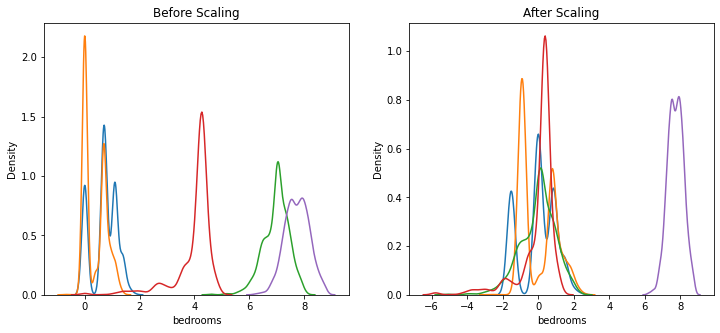

In [91]:
# compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_before_scaled['bedrooms'], ax=ax1)
sns.kdeplot(X_train_before_scaled['bathrooms'], ax=ax1)
sns.kdeplot(X_train_before_scaled['area'], ax=ax1)
sns.kdeplot(X_train_before_scaled['year'], ax=ax1)
sns.kdeplot(X_train_before_scaled['price'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train['bedrooms'], ax=ax2)
sns.kdeplot(X_train['bathrooms'], ax=ax2)
sns.kdeplot(X_train['area'], ax=ax2, )
sns.kdeplot(X_train['year'], ax=ax2)
sns.kdeplot(X_train['price'], ax=ax2)
plt.show()

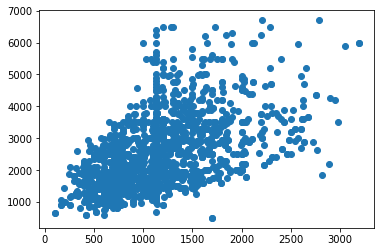

In [92]:
# check linear relationships before log transformation
# before
plt.scatter(X_train_before_log['area'], X_train_before_log['price'])
plt.show()

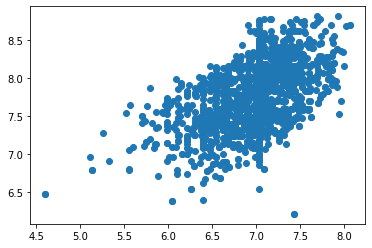

In [93]:
# check linear relationships before scaling
# before
plt.scatter(X_train_before_scaled['area'], X_train_before_scaled['price'])
plt.show()

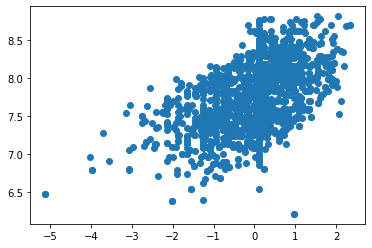

In [94]:
# after
plt.scatter(X_train['area'], X_train['price'])
plt.show()

##### save to csv for future model building use

In [95]:
X_train.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)